In [2]:
# 도미 / 빙어 합친 데이터

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

# column_stack() 전달받은 리스트를 일려로 세운 다음 차례대로 나란히 연결
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


- 리스트처럼 한줄로 길게 출력되지 않고 행과 열을 맞추어 가지런히 정리된 모습


In [6]:
# 동일한 방법으로 타깃 데이터도 만들기 / np.ones() & np.zeros()
# np.concatenate() => 첫 번째 차원에 따라 배열을 연결

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [8]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)
# random_state => 자체적으로 랜덤 시드 지정

- 기본적으로 25%를 테스트 세트로 뗌

In [9]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [10]:
print(train_target.shape, test_target.shape)

(36,) (13,)


- 훈련 데이터와 테스트 데이터를 각가 36개 13개로 나눔
- 입력 데이터는 2개의 열이 있는 2차원 배열 / 타깃 데이터는 1차원 배열

In [11]:
# 도미와 빙어가 잘 섞였는지 테스트 데이터 출력

print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 13개 테스트 세트 중 10개가 도미 3개가 빙어 => 빙어 비율 적음 => ** 샘플링 편향 **

In [12]:
# stratify => 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

In [13]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
# 김 팀장이 알려준 도미 데이터

print(kn.predict([[25, 150]])) # 도미가 아니라 빙어로 나옴

[0.]


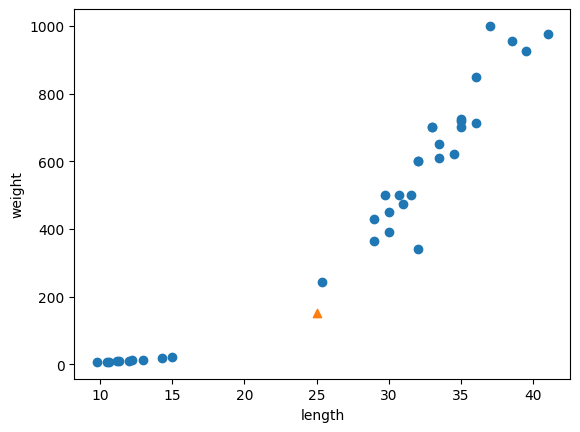

In [18]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

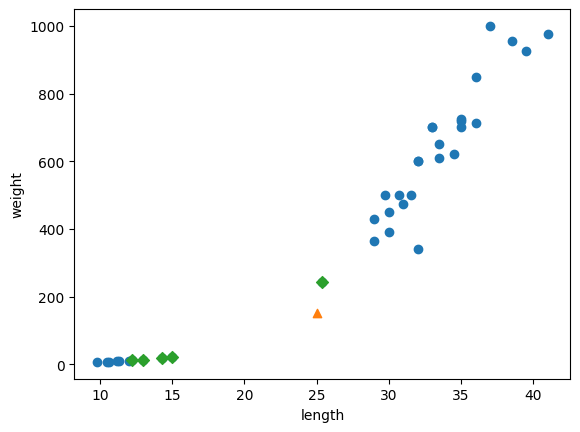

In [19]:
#indexes 배열을 통해 훈련 데이터 중 이웃 샘플을 따로 구분해서 그리기

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
# 삼각형 샘플에 가장 가까운 5개의 샘플 다이아몬드로 표시
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 가까운 이웃에 도미가 하나밖에 포함되지 않음

In [20]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [21]:
print(train_target[indexes]) # 가까운 생선 4개가 빙어

[[1. 0. 0. 0. 0.]]


In [22]:
# kneighbors() 메서드에서 반환한 distances 배열 출력

print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- 그림으로 보면 x, y 축간의 범위가 달라 눈으로 그래프를 보기엔 도미와 가까워보였던 것

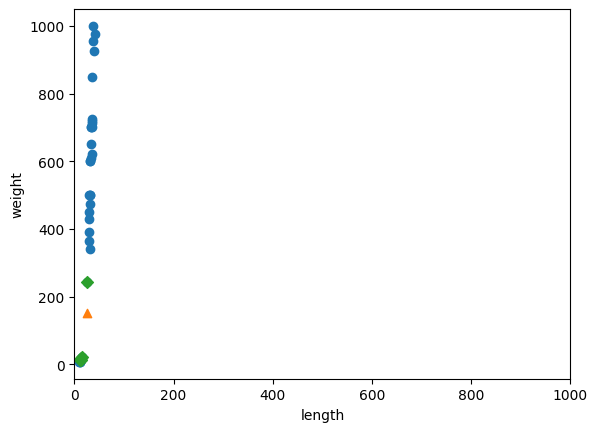

In [23]:
# x축의 범위를 동일하게 0~1000으로 맞춤 / xlim() => x축 범위 지정 / ylim() => y축 범위 지정

plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


- 모든 데이터가 수직으로 늘어선 형태를 보여 무게만 고려 대상이 됨
- 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측될 수 없음 -> k-최근접 이웃 포함
- 제대로 사용하려면 특성값을 일정한 기준으로 맞춰줘야 한다 => **데이터 전처리**


## 표준점수
- 가장 널리 사용하는 전처리 방법
- z 점수라고 부름
- 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지 나타냄
- 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능

In [24]:
# 평균을 빼고 표준편차를 나누어주면 됨

mean = np.mean(train_input, axis = 0) # np.mean() 평균
std = np.std(train_input, axis = 0) # np.std() 표준편차 / axis=0 => 행간 비교

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [27]:
train_scaled = (train_input - mean) / std

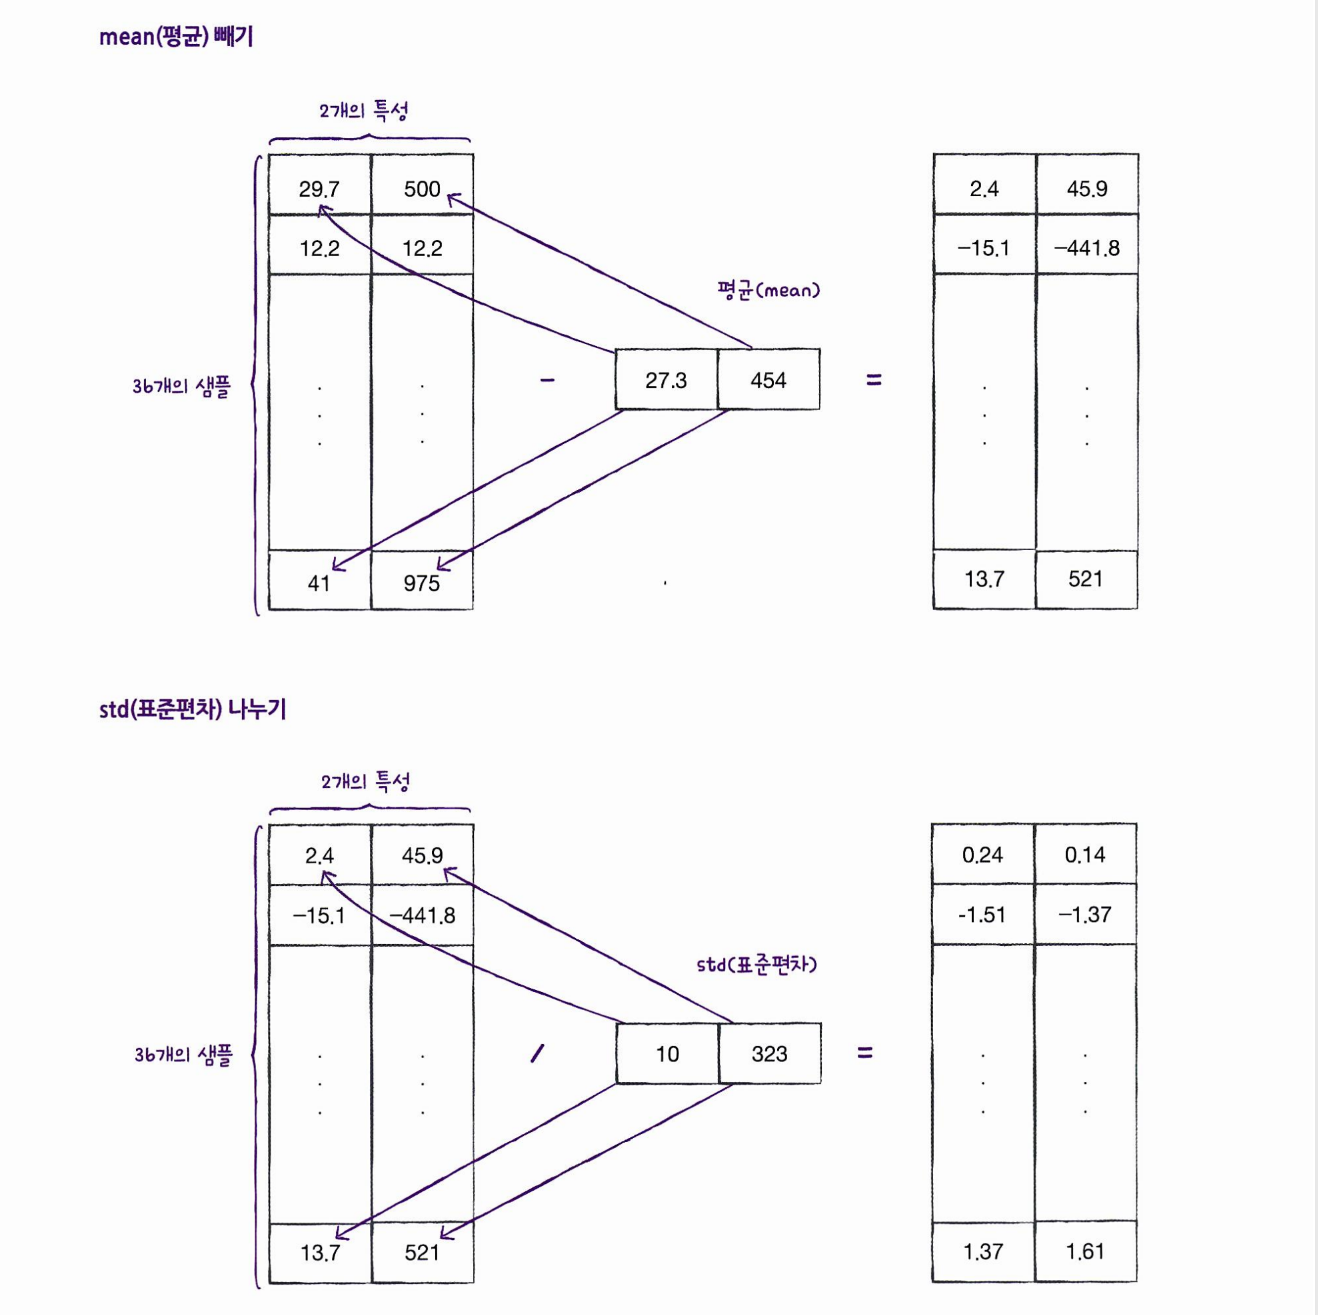

## 전처리 데이터로 모델 훈련하기

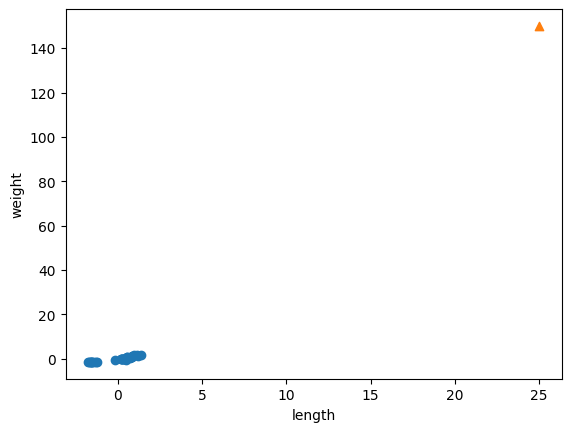

In [28]:
# 김 팀장이 알려준 샘플을 다시 산점도에 표시

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 훈련 세트를 mean, std로 변환했기 때문에 값의 범위가 달라짐
- 샘플도 같은 비율로 변환해야 한다.


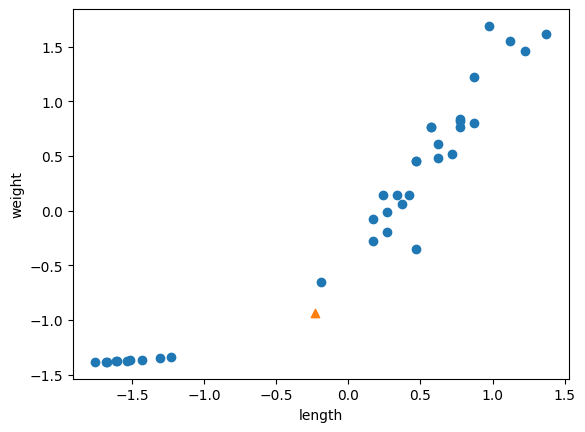

In [29]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 데이터 변환 전 산점도와 거의 동일
- x축과 y축의 범위 -1.5~1.5로 바뀜

In [30]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [31]:
# test 세트도 변환해야 됨

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [32]:
print(kn.predict([new]))

[1.]


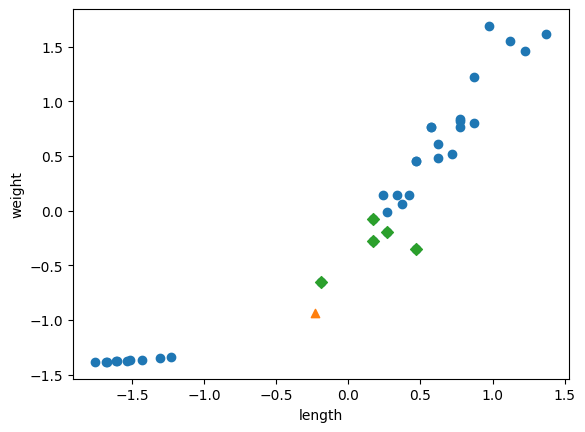

In [33]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 김 팀장의 샘플에서 가장 가까운 샘플은 도미!
- 특성값의 스케일에 민감하지 않고 안정적인 예측이 가능한 모델 만듦